<a href="https://colab.research.google.com/github/yogeesh0004/Machine.Learning.Rainfall.Prediction/blob/master/iotrealtime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("/content/feeds (4).csv")

In [4]:
data.head()

,created_at,entry_id,Temerature,Humidity,Pressure,Rain Drop Value
0,2023-03-18T20:24:33+05:30,1,30.7,69.5,983.50,4
1,2023-03-18T20:24:49+05:30,2,30.7,69.6,983.51,3
2,2023-03-18T20:25:04+05:30,3,30.7,69.8,983.45,3
3,2023-03-18T20:25:04+05:30,4,30.6,69.4,983.54,3
4,2023-03-18T20:26:04+05:30,5,30.6,69.6,983.40,3


In [5]:
data['created_at'] = pd.to_datetime(data['created_at'])

In [6]:
data.dtypes

created_at         datetime64[ns, pytz.FixedOffset(330)]
entry_id                                           int64
Temerature                                       float64
Humidity                                         float64
Pressure                                         float64
Rain Drop Value                                    int64
dtype: object

In [7]:
data['Year'] = pd.DatetimeIndex(data['created_at']).year
data['Month'] = pd.DatetimeIndex(data['created_at']).month

In [9]:
data.drop(columns='created_at',inplace=True)

<Axes: xlabel='Rain Drop Value', ylabel='Density'>

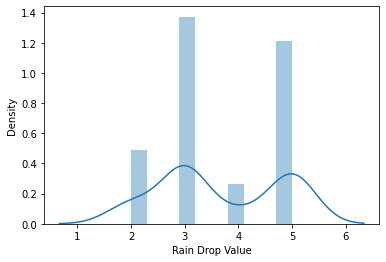

In [10]:
sns.distplot(data['Rain Drop Value'],bins=10)

<Axes: >

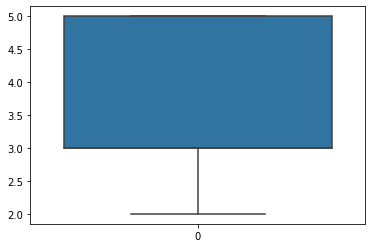

In [11]:
sns.boxplot(data['Rain Drop Value'])

In [23]:
x = data.drop(['Rain Drop Value','entry_id','Year','Month'], axis=1)

y = data['Rain Drop Value'].values.astype('float32')
y = y.reshape(-1, 1)


In [24]:
sc = StandardScaler()
x_std = sc.fit_transform(x)
x_std = pd.DataFrame(x_std,columns=x.columns)

In [25]:
x_std.describe()

,Temerature,Humidity,Pressure
count,1.020000e+02,1.020000e+02,1.020000e+02
mean,2.381537e-15,1.542339e-15,-2.120744e-14
std,1.004938e+00,1.004938e+00,1.004938e+00
min,-1.788428e+00,-1.668711e+00,-1.107727e+00
25%,-1.180193e+00,-6.753584e-01,-7.536071e-01
50%,5.938237e-01,-4.287814e-01,-5.960706e-01
75%,5.938237e-01,9.520495e-01,1.036519e+00
max,1.252744e+00,2.051078e+00,1.728827e+00


In [26]:
x_train,x_test,y_train,y_test = train_test_split(x_std,y,test_size=0.2,random_state=42)

In [27]:
reg_model = LinearRegression()
reg_model.fit(x_train,y_train)

LinearRegression()

In [28]:
y_predicted = reg_model.predict(x_test)

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


print('Mean absolute error = ' + str(mean_absolute_error(y_test, y_predicted)))
print('Mean squared error = ' + str(mean_squared_error(y_test, y_predicted)))
print('R2 score = ' + str(r2_score(y_test, y_predicted)))

Mean absolute error = 0.42075261219901894
Mean squared error = 0.38859907052224296
R2 score = 0.7305468705610837


In [58]:
from sklearn.model_selection import cross_val_score
#from sklearn.metrics import tr
from sklearn.model_selection import cross_val_score, train_test_split

from sklearn.metrics import r2_score as r2
import xgboost as xg 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error as MSE 

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

In [59]:
def LR(X,y,k=10):
    scores=[]
    mse=[]
    mae=[]
    for i in range(k):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
        reg = LinearRegression()
        reg.fit(X_train,y_train)
        y_pred=reg.predict(X_test)
        scores.append(r2(y_test,y_pred))
        mse.append(MSE(y_test,y_pred))
        mae.append(MAE(y_test,y_pred))
    fig ,ax =plt.subplots()
    ax.scatter(y_test,y_pred,edgecolors=(0,0,0))
    ax.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=4)
    ax.set_label('Actual')
    ax.set_label('Predicted')
    plt.title('Test data viz (LR)')
    plt.show()
    return scores,mse,mse

SVM REGRESSOR

In [60]:
def SVMRegressor(X,y,k=10):
    scores=[]
    mse=[]
    mae=[]
    for i in range(k):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
        reg = SVR()
        reg.fit(X_train,y_train)
        y_pred=reg.predict(X_test)
        scores.append(r2(y_test,y_pred))
        mse.append(MSE(y_test,y_pred))
        mae.append(MAE(y_test,y_pred))
    fig ,ax =plt.subplots()
    ax.scatter(y_test,y_pred,edgecolors=(0,0,0))
    ax.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=4)
    ax.set_label('Actual')
    ax.set_label('Predicted')
    plt.title('Test data viz (SVR)')
    plt.show()
    return scores,mse,mse,

RANDOM FOREST

In [61]:
def RF(X,y,k=10):
    scores=[]
    mse=[]
    mae=[]
    for i in range(k):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
        reg = RandomForestRegressor(max_depth=4, random_state=0)
        reg.fit(X_train,y_train)
        y_pred=reg.predict(X_test)
        scores.append(r2(y_test,y_pred))
        mse.append(MSE(y_test,y_pred))
        mae.append(MAE(y_test,y_pred))
    fig ,ax =plt.subplots()
    ax.scatter(y_test,y_pred,edgecolors=(0,0,0))
    ax.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=4)
    ax.set_label('Actual')
    ax.set_label('Predicted')
    plt.title('Test data viz (RF)')
    plt.show()
    return scores,mse,mse
   

ARTIFICIAL NUERAL NETWORK(ANN)

In [62]:
def ANN(X,y,k=10):
    scores=[]
    mse=[]
    mae=[]
    for i in range(k):
        
        # fit the keras model on the dataset

        X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
        model = Sequential()
        model.add(Dense(20, input_dim=X.shape[1],kernel_initializer='normal', activation='relu'))
        #model.add(Dense(32,kernel_initializer='normal', activation='relu'))
        model.add(Dense(16,kernel_initializer='normal', activation='relu'))
        model.add(Dense(1, activation='relu'))
        # Compile model
        model.compile(loss='mean_squared_error', optimizer='adam')
        model.fit(X_train.astype('float32'), y_train.astype('float32'),epochs=50, batch_size=5, verbose=0)
        y_pred = model.predict(np.array(X_test.astype('float32')))
        if len(scores)==0:
            model.save('best_model.h5')
        elif r2(y_test.astype('float32'),y_pred) > max(scores):
            model.save('best_model.h5')
        scores.append(r2(y_test.astype('float32'),y_pred))
        mse.append(MSE(y_test,y_pred))
        mae.append(MAE(y_test,y_pred))
    model= load_model('best_model.h5')
    X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
    y_pred = model.predict(np.array(X_test.astype('float32')))
    fig ,ax =plt.subplots()
    ax.scatter(y_test,y_pred,edgecolors=(0,0,0))
    ax.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=4)
    ax.set_label('Actual')
    ax.set_label('Predicted')
    plt.title('Test data viz (ANN)')
    plt.show()
    return scores,mse,mse

OUTPUT FOR LINEAR REGRESSION

Linear Regressor


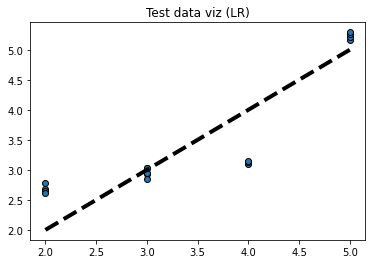

R2 score: 0.7762017081460871
MSE: 0.2788736527398368
MAE: 0.2788736527398368


In [63]:
print("Linear Regressor")
lr,lrmse,lrmae=LR(X,Y)
print("R2 score: "+str(sum(lr)/len(lr)))
print("MSE: "+str(sum(lrmse)/len(lrmse)))
print("MAE: "+str(sum(lrmae)/len(lrmae)))

OUTPUT FOR SVM REGRESSOR

Support Vector Machine Regressor


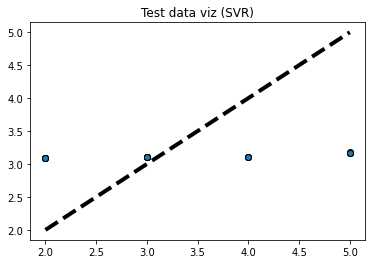

R2 score: -0.03417882275249062
MSE: 1.2886837674142362
MAE: 1.2886837674142362


In [39]:
print("Support Vector Machine Regressor")
svr,svrmse,svrmae=SVMRegressor(X,Y)
print("R2 score: " +str(sum(svr)/len(svr)))
print("MSE: "+str(sum(svrmse)/len(svrmse)))
print("MAE: "+str(sum(svrmae)/len(svrmae)))

OUTPUT FOR RF REGRESSOR

Random Forest Regressor


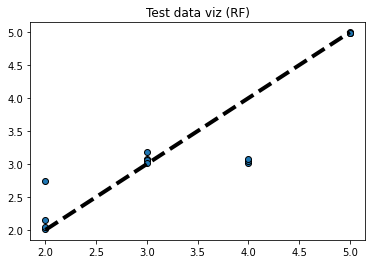

R2 score: 0.8321088885593888
MSE: 0.20920806464669917
MAE: 0.20920806464669917


In [40]:
print("Random Forest Regressor")
rf,rfmse,rfmae=RF(X,Y)
print("R2 score: " +str(sum(rf)/len(rf)))
print("MSE: "+str(sum(rfmse)/len(rfmse)))
print("MAE: "+str(sum(rfmae)/len(rfmae)))

OUTPUT FOR ANN

Regression with Artificial Neural Networks (ANN)
1/1 [==============================] - 0s 97ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 60ms/step


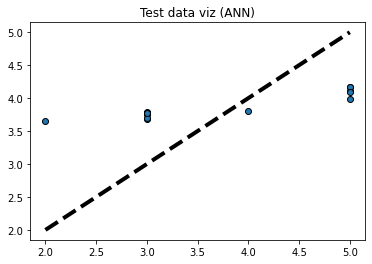

R2 score: -7.138825283408529
MSE: 8.763786959648133
MAE: 8.763786959648133


In [41]:
print("Regression with Artificial Neural Networks (ANN)")
ann,annmse,annmae=ANN(X,Y)
print("R2 score: " +str((sum(ann)/len(ann))))
print("MSE: "+str(sum(annmse)/len(annmse)))
print("MAE: "+str(sum(annmae)/len(annmae)))

COMPARISON ON R2 SCORES

In [42]:
import numpy as np
import matplotlib.pyplot as plt

[Text(1, 0, 'LinearRegressor'),
 Text(2, 0, 'SVR'),
 Text(3, 0, 'RandomForest'),
 Text(4, 0, 'ANN')]

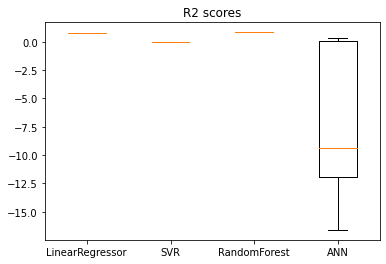

In [43]:
models= {'LinearRegressor':lr,'SVR':svr,'RandomForest':rf,'ANN':ann}

fig, ax = plt.subplots()
plt.title('R2 scores')
ax.boxplot(models.values())
ax.set_xticklabels(models.keys())

COMPARISON ON MEAN SQUARED ERROR

[Text(1, 0, 'LinearRegressor'),
 Text(2, 0, 'SVR'),
 Text(3, 0, 'RandomForest'),
 Text(4, 0, 'ANN')]

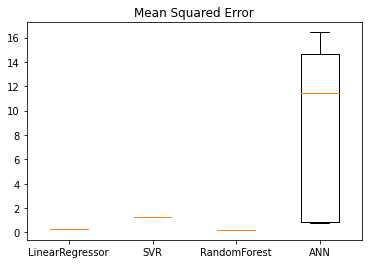

In [44]:
models= {'LinearRegressor':lrmse,'SVR':svrmse,'RandomForest':rfmse,'ANN':annmse}

fig, ax = plt.subplots()
plt.title('Mean Squared Error')
ax.boxplot(models.values())
ax.set_xticklabels(models.keys())

COMPARISON ON MEAN ABSOLUTE ERROR

[Text(1, 0, 'LinearRegressor'),
 Text(2, 0, 'SVR'),
 Text(3, 0, 'RandomForest'),
 Text(4, 0, 'ANN')]

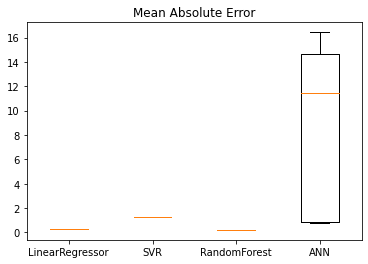

In [45]:
models= {'LinearRegressor':lrmae,'SVR':svrmae,'RandomForest':rfmae,'ANN':annmae}

fig, ax = plt.subplots()
plt.title('Mean Absolute Error')
ax.boxplot(models.values())
ax.set_xticklabels(models.keys())

some prediction with random input

In [46]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 13.3 MB/s eta 0:00:00


In [47]:
from catboost import CatBoostRegressor

In [48]:
model=CatBoostRegressor(iterations=100, depth=10, learning_rate=0.01, loss_function='RMSE')

In [49]:
model.fit(X,Y ,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.1072886	total: 47.5ms	remaining: 4.7s
1:	learn: 1.0999783	total: 54.4ms	remaining: 2.66s
2:	learn: 1.0921748	total: 57.8ms	remaining: 1.87s
3:	learn: 1.0848876	total: 58.5ms	remaining: 1.4s
4:	learn: 1.0773664	total: 62.6ms	remaining: 1.19s
5:	learn: 1.0706089	total: 65ms	remaining: 1.02s
6:	learn: 1.0638400	total: 67.3ms	remaining: 894ms
7:	learn: 1.0569247	total: 67.9ms	remaining: 781ms
8:	learn: 1.0498057	total: 70.6ms	remaining: 713ms
9:	learn: 1.0424540	total: 72.9ms	remaining: 656ms
10:	learn: 1.0349897	total: 73.5ms	remaining: 595ms
11:	learn: 1.0278225	total: 74.5ms	remaining: 546ms
12:	learn: 1.0209011	total: 76.7ms	remaining: 513ms
13:	learn: 1.0138578	total: 78.9ms	remaining: 485ms
14:	learn: 1.0070938	total: 81ms	remaining: 459ms
15:	learn: 1.0002787	total: 83.2ms	remaining: 437ms
16:	learn: 0.9935393	total: 84.5ms	remaining: 413ms
17:	learn: 0.9871735	total: 85ms	remaining: 387ms
18:	learn: 0.9796010	total: 85.7ms	remaining: 365ms
19:	learn: 0.9730857	total: 87

In [64]:
inp = np.array([[30.7],[69.5],[983.50]])

inp = inp.reshape(1, -1)


# Print output
print('The Rain Drop Value in inches for the input is:', model.predict(inp))

The Rain Drop Value in inches for the input is: [3.33874225]


In [65]:
reg_model = LinearRegression()
reg_model.fit(x_train,y_train)

LinearRegression()

In [66]:
y_predicted = reg_model.predict(inp)
y_predicted

array([[1462.89720095]])

In [74]:
reg = SVR()
reg.fit(x_train,y_train)


SVR()

In [76]:
y_predicted = reg.predict(inp)
y_predicted 

array([3.8103553])

In [78]:
reg = RandomForestRegressor()
reg.fit(x_train,y_train)

RandomForestRegressor()

In [79]:
y_predicted = reg.predict(inp)
y_predicted 

array([4.47])